In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("C:/Users/SURAJ/Desktop/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Shape of the dataset

In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Removing Duplicates 

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## Check null values

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Drop unnecessary columns

In [8]:
df.drop(['id','name','host_name','last_review'],axis=1, inplace=True)

## Examining Changes

In [9]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Replace the 'reviews_per_month' by zero

In [10]:
df.fillna({'reviews_per_month':0},inplace=True)
df.reviews_per_month.isnull().sum()

0

## Remove the NaN values from the dataset

In [11]:
df.isnull().sum()
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

## Examine Continuous Variable

In [12]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Columns names

In [13]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## Correlation between different variables

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

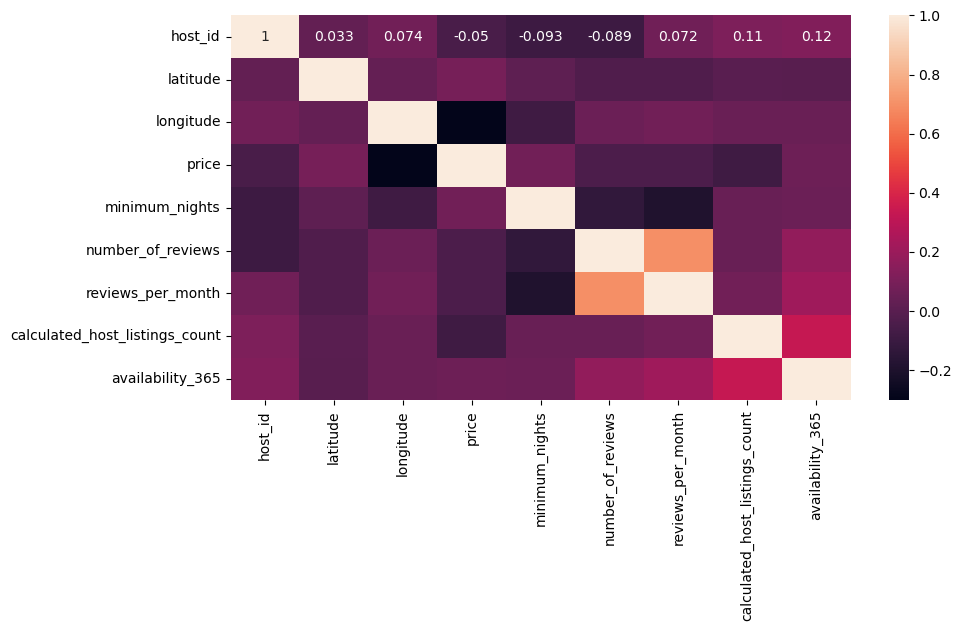

In [14]:
corr = df.select_dtypes(include=['number']).corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
df.columns

In [15]:
df.shape

(48895, 12)

In [16]:
df.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


## Data Visualization

In [17]:
import seaborn as sns

In [18]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

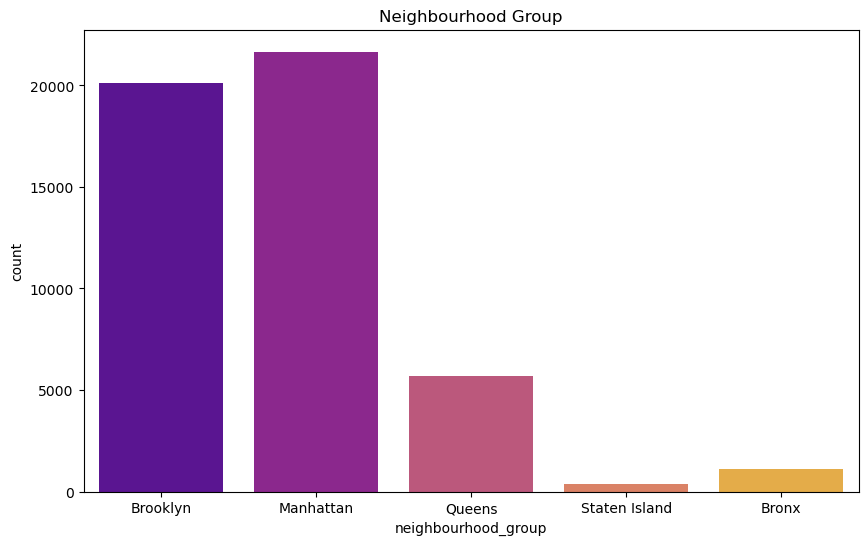

In [19]:
sns.countplot(x='neighbourhood_group', data=df, palette = "plasma")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Neighbourhood Group')

## Neighbourhood

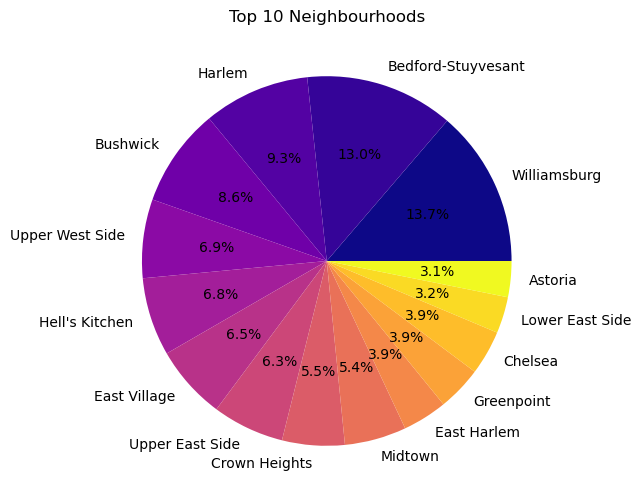

In [20]:
plt.figure(figsize=(10, 6))
df['neighbourhood'].value_counts().head(15).plot.pie(autopct='%1.1f%%', cmap='plasma')
plt.ylabel('')
plt.title('Top 10 Neighbourhoods')
plt.show()

## Room Type

Text(0.5, 1.0, 'Restaurant Delivering Online or Not')

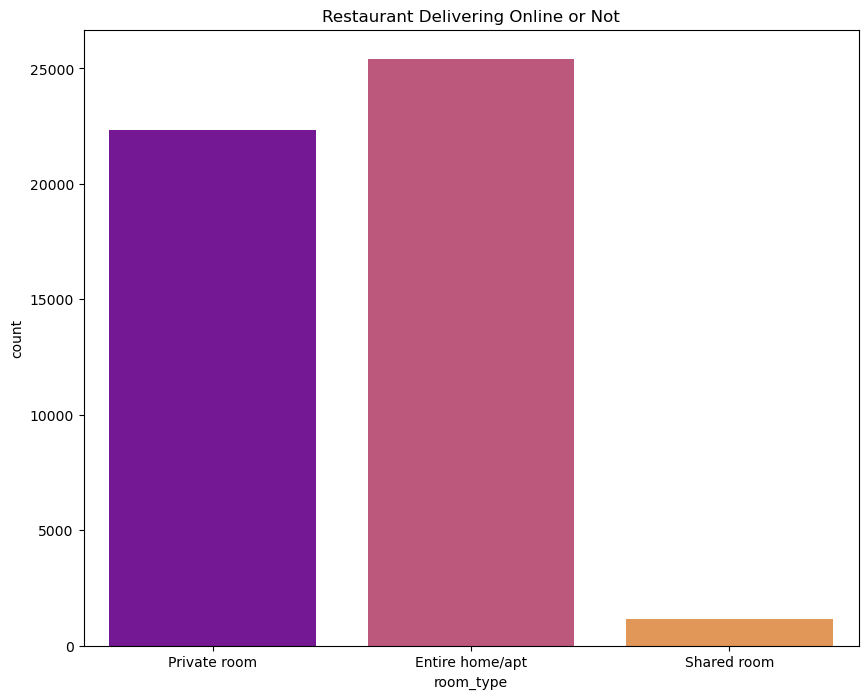

In [21]:
sns.countplot(x='room_type',data=df, palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Restaurant Delivering Online or Not')

## Relation between neighbourgroup and Availability of Room

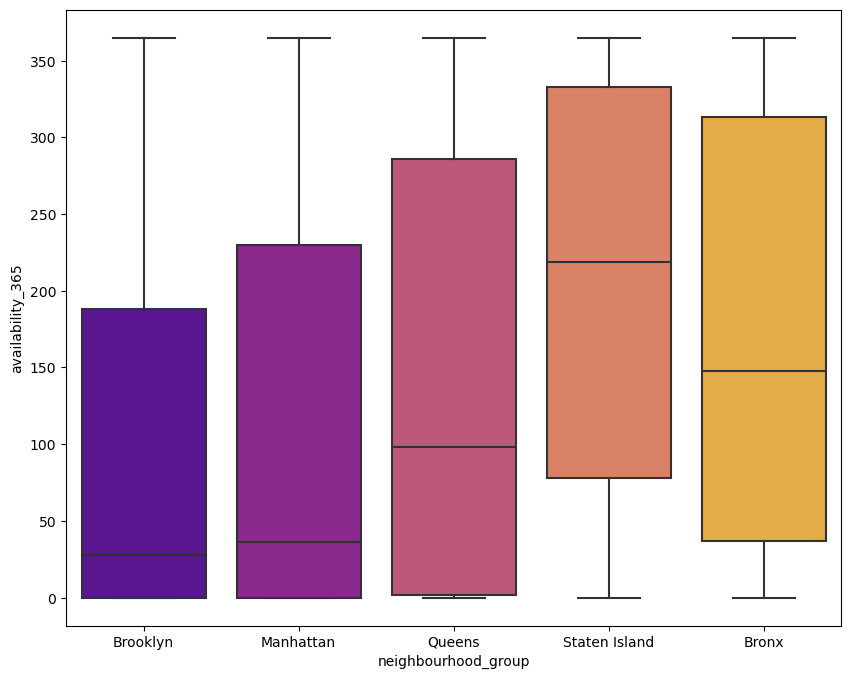

In [22]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='neighbourhood_group',y='availability_365', data=df, palette='plasma')

## Map for Neighbourhood Group

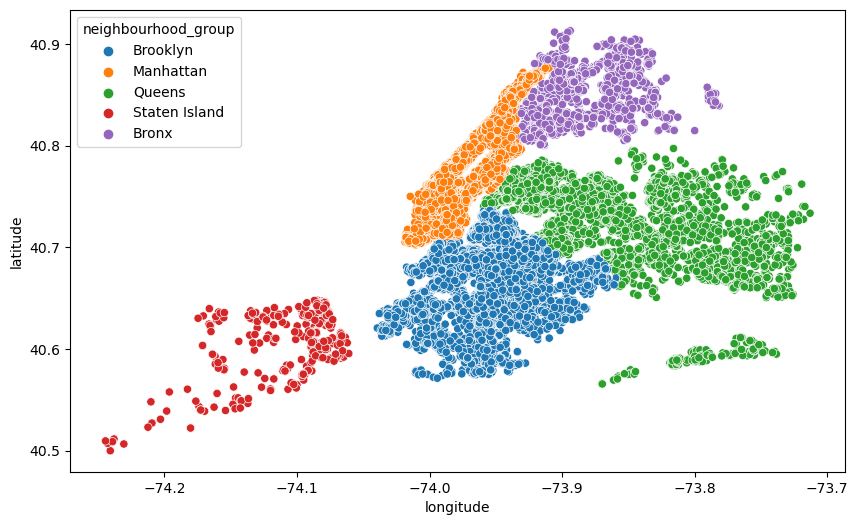

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group)
plt.show()

## Map for Neighbourhood

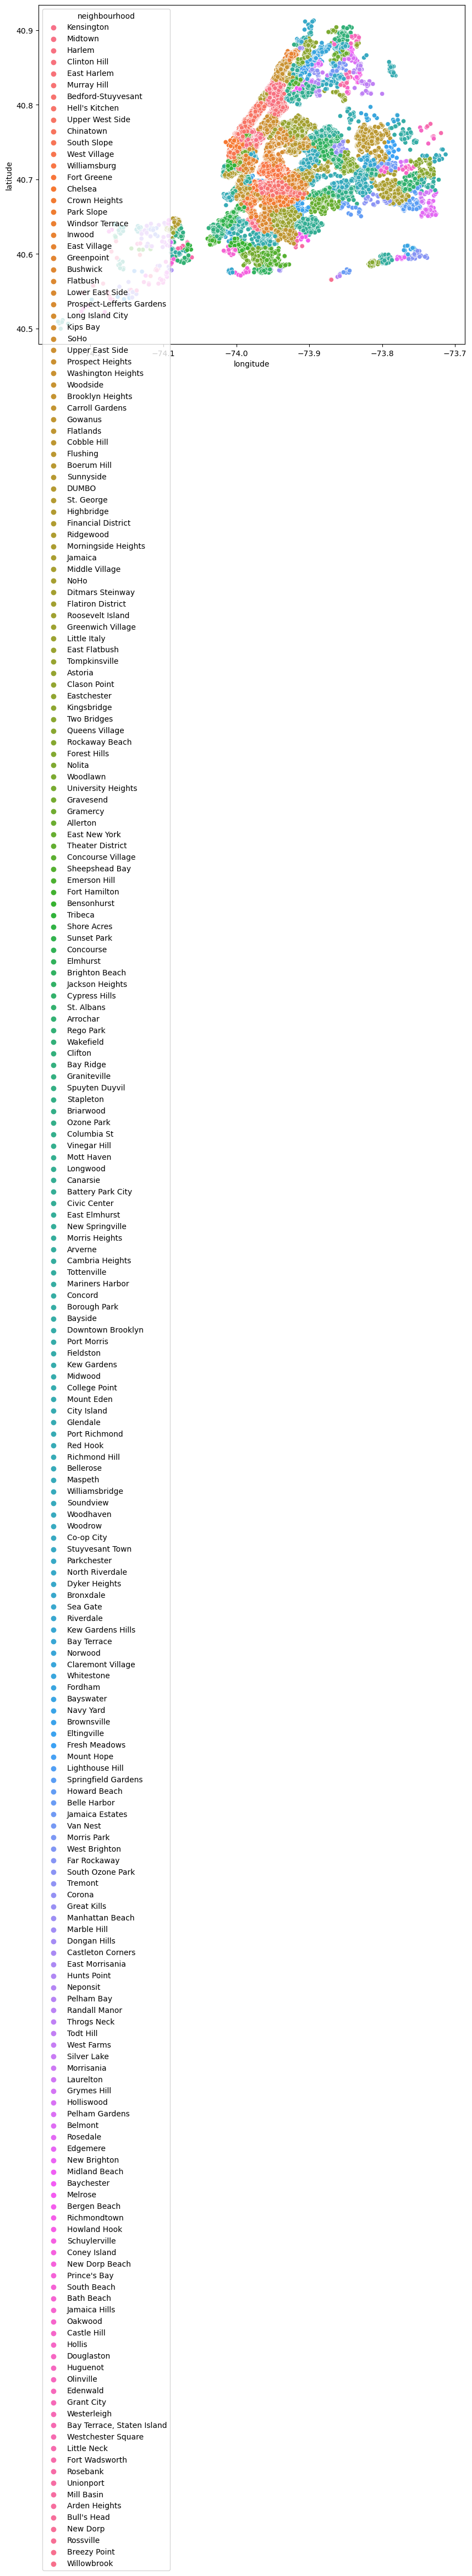

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood)
plt.show()

## Map of Room type

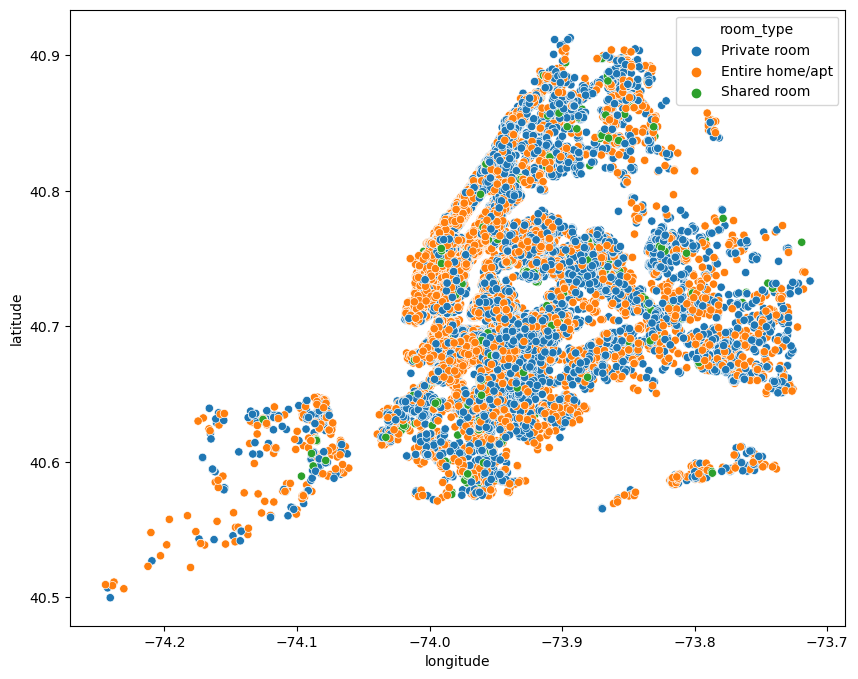

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type)
plt.show()

## Availability of Room

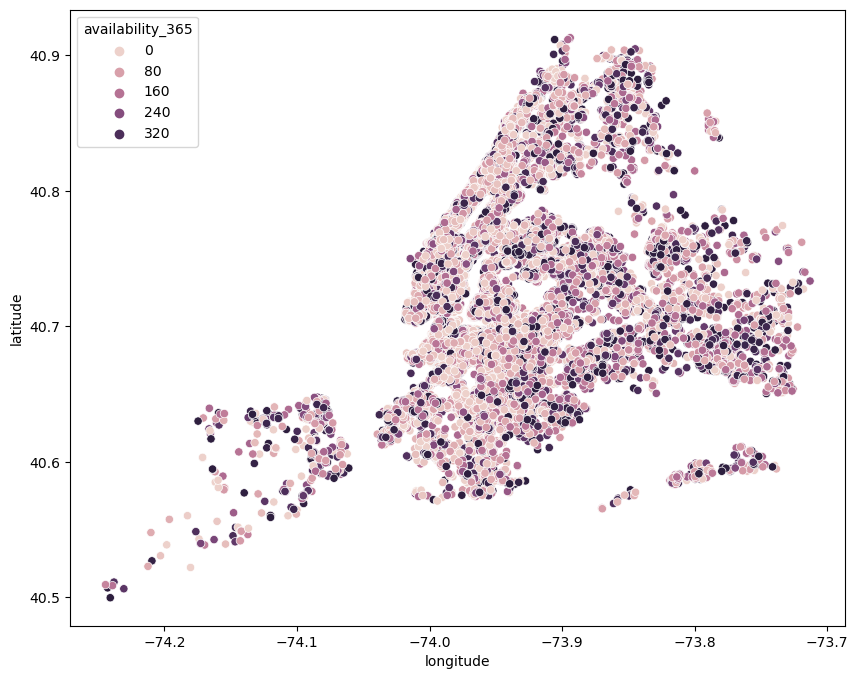

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.availability_365)
plt.show()

## WordCloud

In [27]:
from wordcloud import WordCloud

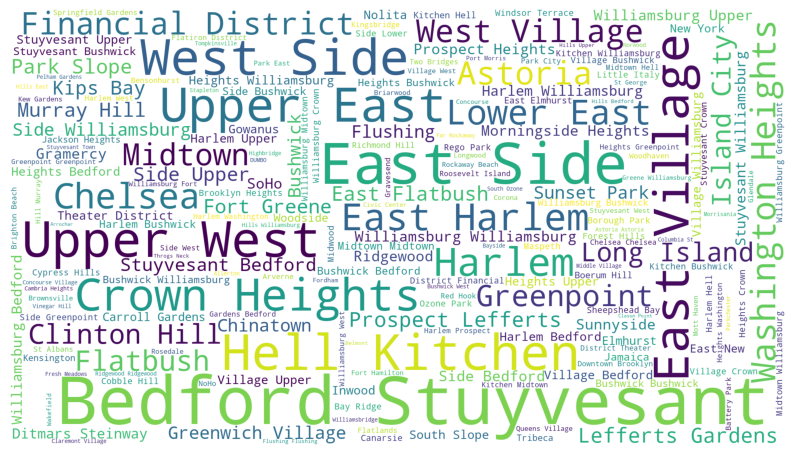

In [28]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                        background_color='white',
                        width=1920,
                        height=1080
                        ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

## Regression Analysis

### Drop Columns

In [29]:
df.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

In [30]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [31]:
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group','room_type'])]:
        df[column] = df[column].factorize()[0]
    return df
df_en = Encode(df.copy())

In [32]:
df_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


## Get Correlation between different variables

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

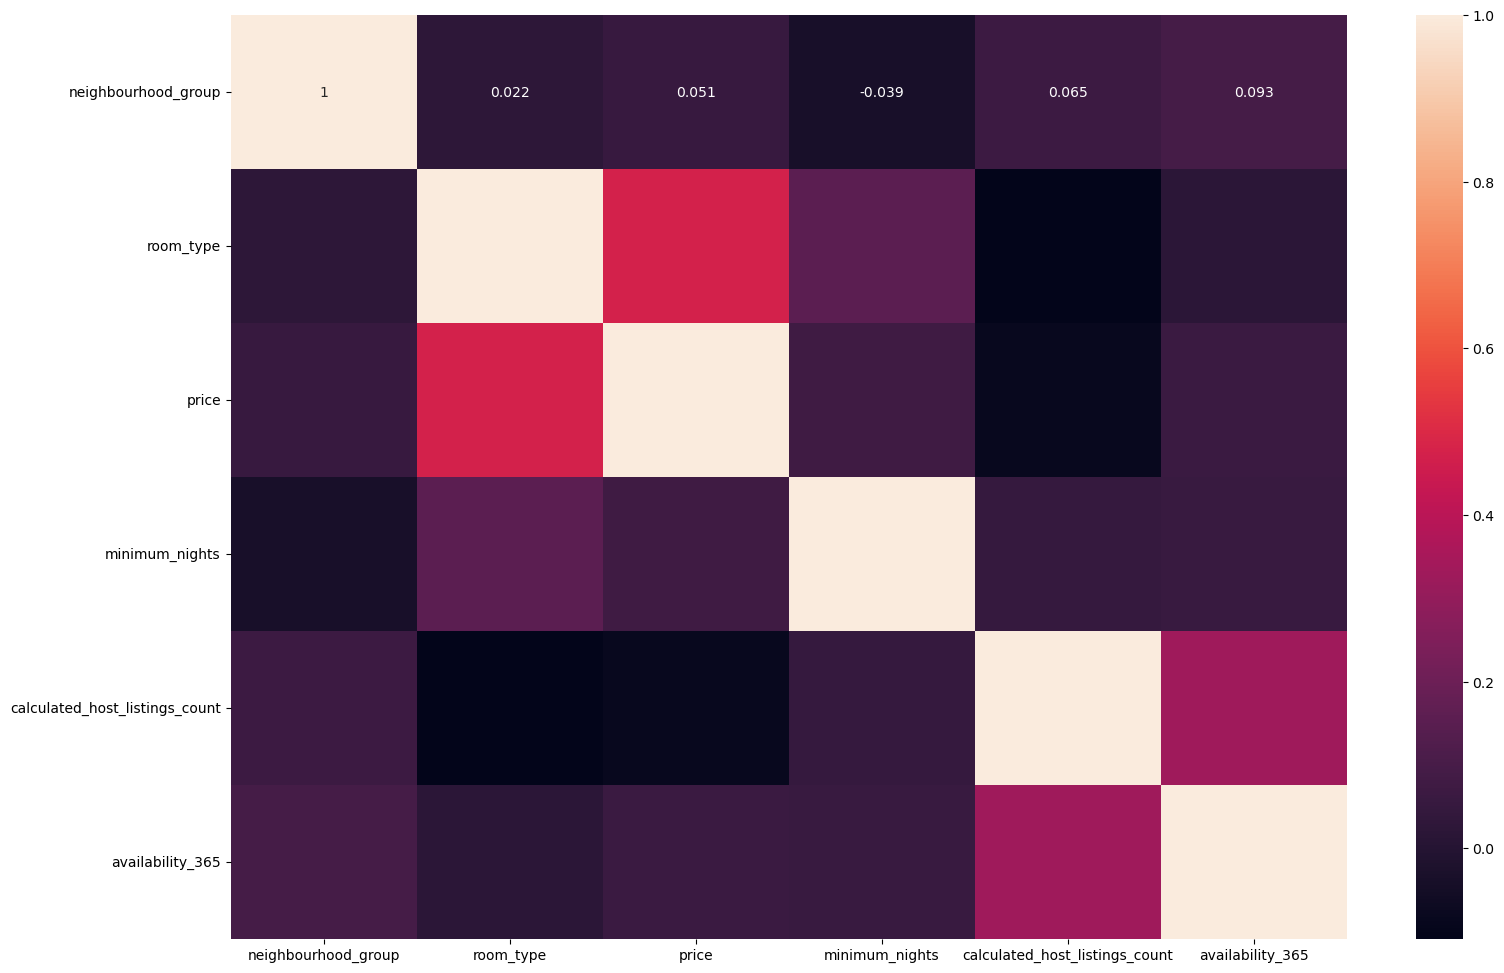

In [33]:
corr = df_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
df_en.columns

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

## Defining the independent variables and dependent variables

In [35]:
x = df_en.iloc[:,[0,1,3,4,5]]
y = df_en['price']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.1, random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [36]:
x_train.shape

(44005, 5)

## Prepare a Linear Regression Model

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07480306392848757

## Preparing Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1, random_state=105)

DTree = DecisionTreeRegressor(min_samples_leaf=.0001)

DTree.fit(x_train,y_train)
y_predict = DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.2534090076566696